In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Lucas Panfilo Donaire #
# NUSP : 12556552 #
# Turma: 2024145 #
# Prof.: Ronaldo #
##################################################################

# Funções basicas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.pyplot import imread
from cv2 import imwrite

In [3]:
nomes_imgs = os.listdir('images')
images = {idx: imread(f'images\\{nomes_imgs[idx]}') for idx in range(len(nomes_imgs))}

def show(image,title=''):
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.show()

def get_infos(nome_image):
    divisao = nome_image.split(').jpg')[0].split(')_')
    classes = divisao[0].split('(')[1].split(',')
    objetos = divisao[1].split('(')[1].split(',')
    fundo = divisao[2].split('(')[1]
    casa = divisao[3].split('(')[1]
    dia = divisao[4].split('(')[1]
    return [classes, objetos, fundo, casa, dia]

def get_rows(nome_image, idx_image):
    rows = []
    classes, objetos, fundo, casa, dia = get_infos(nome_image)
    for i,item in enumerate(classes):
        rows.append([idx_image, item, item+objetos[i], fundo, casa, dia])
    return rows

colunas = ['Idx Foto','Classe','Objeto','Fundo','Casa','Dia']
rows = []
for idx, image in enumerate(nomes_imgs):
    rows.extend(get_rows(image, idx))
df_images = pd.DataFrame(rows, columns=colunas)
df_images['Iluminação'] = df_images['Casa'].map({'True':'Casa ','False':'Fora '}) + df_images['Dia'].map({'True':'Dia','False':'Noite'})
df_images['Fundo_Iluminação'] = df_images['Fundo'] + ' '+ df_images['Iluminação']
df_images['Objeto_Fundo_Iluminação'] = df_images['Objeto'] + ' '+df_images['Fundo'] + ' '+ df_images['Iluminação']

def get_class_detais(df_images):
    classes = df_images['Classe'].unique()
    df_rows = []
    for classe in classes:
        df_classe = df_images[df_images['Classe']==classe]
        row = [
            classe,
            len(df_classe['Objeto'].unique()),
            len(df_classe['Fundo'].unique()),
            str(df_classe['Fundo'].unique())[1:-1].replace('\n',''),
            len(df_classe['Iluminação'].unique()),
            str(df_classe['Iluminação'].unique())[1:-1].replace('\n',''),
            df_classe.groupby('Objeto_Fundo_Iluminação').count()['Idx Foto'].min(), # minimo de repeticoes | pois todos devem ter ao menos 3 repeticoes (e nessa base, todos tem 3 de fato, como já mostrado acima)
            len(df_classe)
        ]
        df_rows.append(row)
    return pd.DataFrame(df_rows, columns=['Classe','Num_Objetos','Num_Fundos','Fundos','Num_Iluminações','Iluminações','Repetições','Total de amostras'])

# Parte 2 Ep 2

In [4]:
# Equalização de histograma da lista 1
import pandas as pd
def equalization(image):
  count = [0 for _ in range(256)]
  for row in image:
    for pixel in row:
      count[int(pixel)] += 1 # lista com 256 entradas tal que o valor de lista[i] é a quantidade de pixels com intensidade i
  Npixels = image.shape[0] * image.shape[1]
  transform = pd.Series(count).cumsum()*255/Npixels # uso o pandas pq a Series fica como uma função que leva cada intensidade r, de 0 a 255, em T(r)
  return np.array([np.array([int(transform[int(item)]) for item in row]) for row in image])

In [5]:
# OriginalGray Dataset e Augmented DataSet
images_gray = {}
images_stretch = {}
images_log = {}
images_exp = {}
images_laplacian = {}
images_mean = {}
for key in images.keys():
    images_gray[key] =  imread(f'augmented_images\\gray\\Image{key}.jpg')
    images_stretch[key] =  imread(f'augmented_images\\stretch\\Image{key}.jpg')
    images_log[key] =  imread(f'augmented_images\\log\\Image{key}.jpg')
    images_exp[key] =  imread(f'augmented_images\\exp\\Image{key}.jpg')
    images_laplacian[key] =  imread(f'augmented_images\\laplacian\\Image{key}.jpg')
    images_mean[key] =  imread(f'augmented_images\\mean\\Image{key}.jpg')

In [6]:
# Criando as pastas
notebook_dir = os.getcwd()
new_dir = os.path.join(notebook_dir, 'normalized_images')
for subpasta in ['exp','laplacian','log','mean','stretch','gray']:
    new_dir2 = os.path.join(new_dir,subpasta)
    os.makedirs(new_dir2, exist_ok=True)

In [7]:
# Normalized DataSet
eq_images_gray = {}
eq_images_stretch = {}
eq_images_log = {}
eq_images_exp = {}
eq_images_laplacian = {}
eq_images_mean = {}
for idx_image, image_gray in images_gray.items():
    ############ gray
    eq_image_gray = equalization(image_gray)
    imwrite(f'normalized_images\\gray\\Image{idx_image}.jpg', eq_image_gray)
    eq_images_gray[idx_image] = eq_image_gray
    ############ contrast stretching
    eq_image_sretch = equalization(images_stretch[idx_image])
    imwrite(f'normalized_images\\stretch\\Image{idx_image}.jpg', eq_image_sretch)
    eq_images_stretch[idx_image] = eq_image_sretch
    ############ exp
    eq_image_exp = equalization(images_exp[idx_image])
    imwrite(f'normalized_images\\exp\\Image{idx_image}.jpg', eq_image_exp)
    eq_images_exp[idx_image] = eq_image_exp
    ############ log
    eq_image_log = equalization(images_log[idx_image])
    imwrite(f'normalized_images\\log\\Image{idx_image}.jpg', eq_image_log)
    eq_images_log[idx_image] = eq_image_log
    ############ laplacian
    eq_image_laplacian = equalization(images_laplacian[idx_image])
    imwrite(f'normalized_images\\laplacian\\Image{idx_image}.jpg', eq_image_laplacian)
    eq_images_laplacian[idx_image] = eq_image_laplacian
    ############ mean
    eq_image_mean = equalization(images_mean[idx_image])
    imwrite(f'normalized_images\\mean\\Image{idx_image}.jpg', eq_image_mean)
    eq_images_mean[idx_image] = eq_image_mean

## Calculo do histograma médio

In [8]:
def histograma_medio(list_images, title = ''):
    image_media = sum(list_images) / len(list_images)
    # image_media = np.mean(list_images)
    plt.title(title)
    plt.hist(image_media.flatten(), bins=256, range=(0, 256), density=True)
    plt.show()

## Para cada iluminação no GrayDataSet

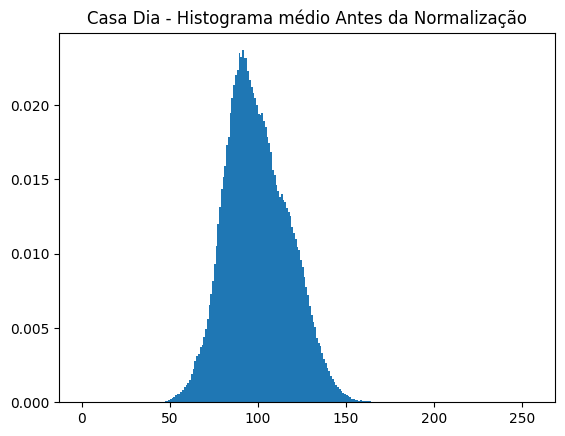

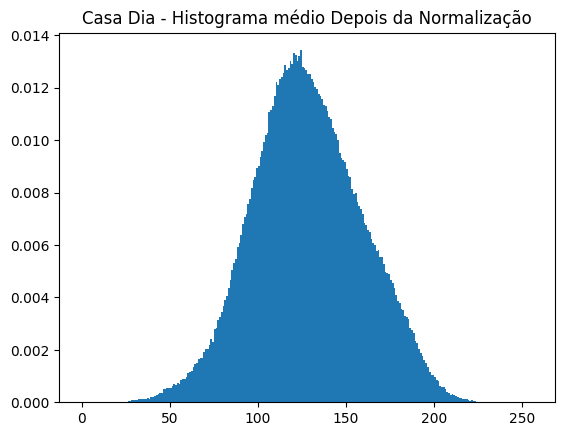

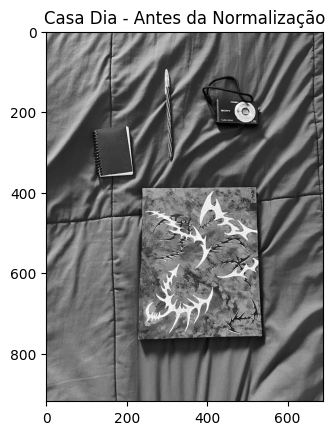

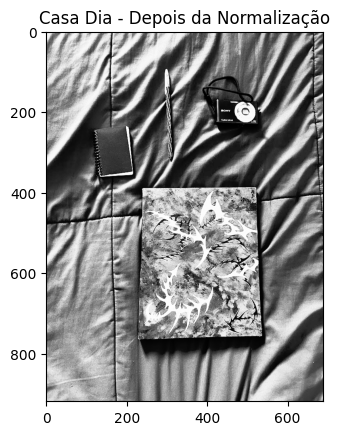

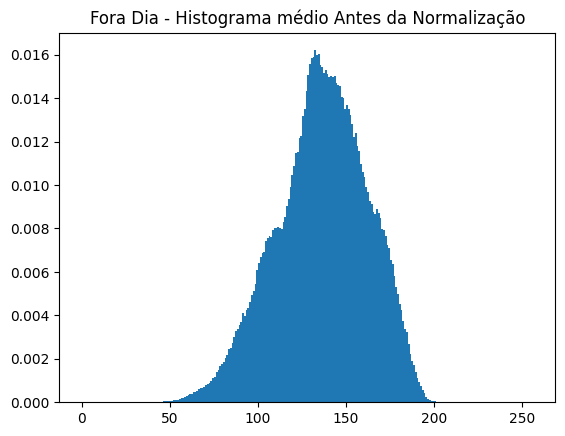

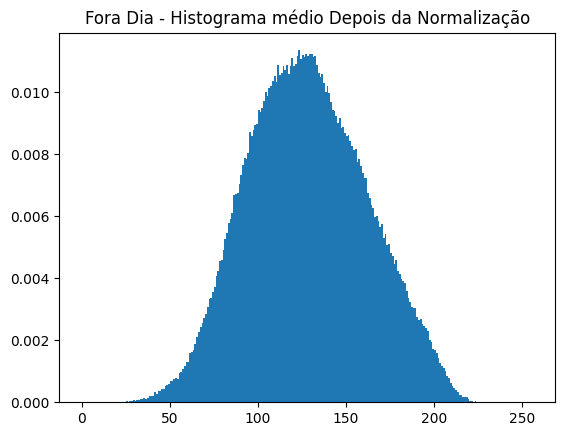

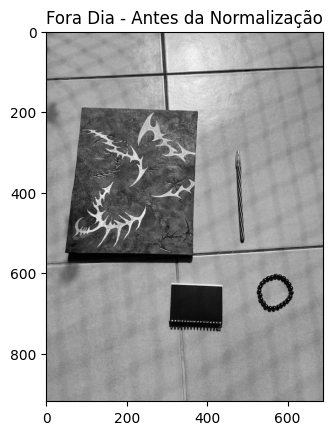

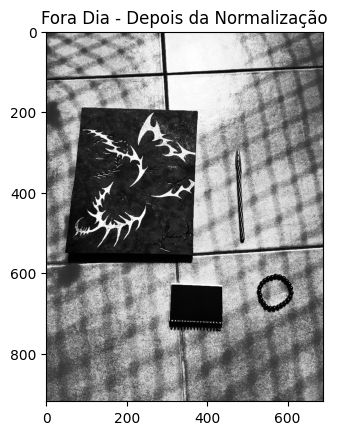

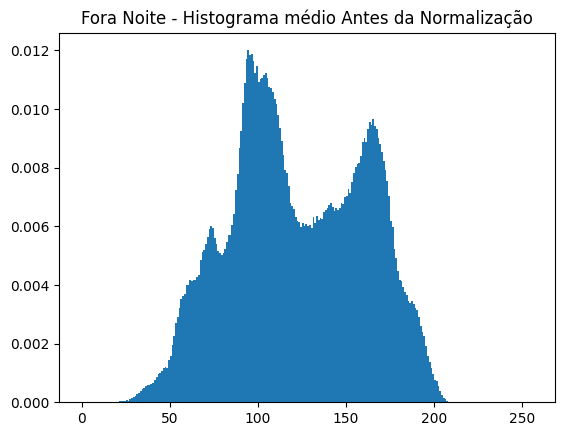

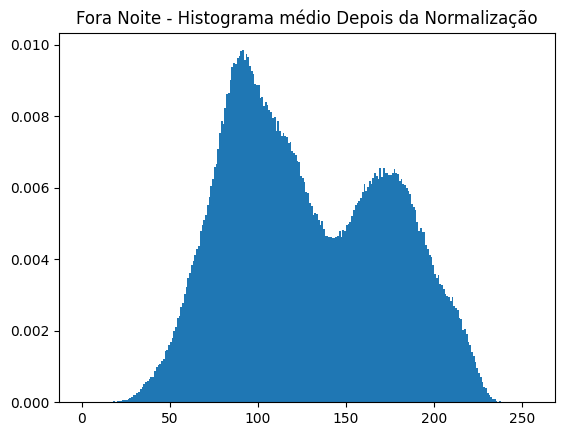

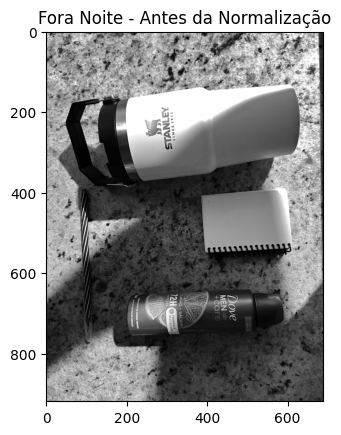

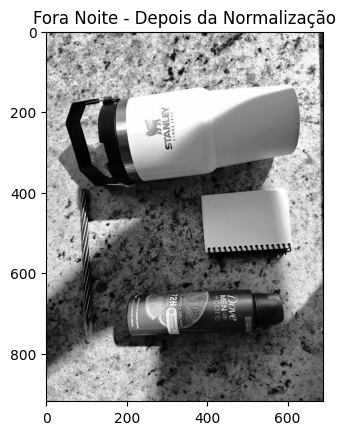

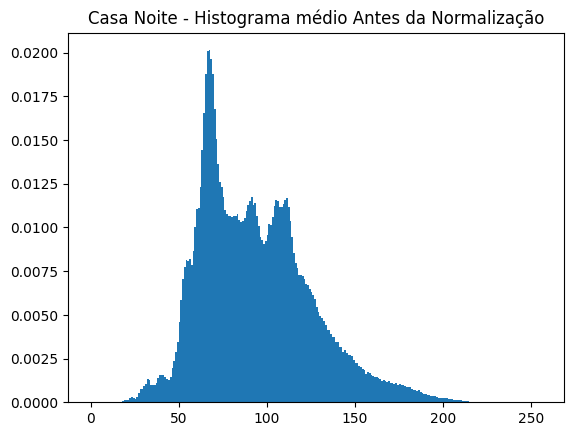

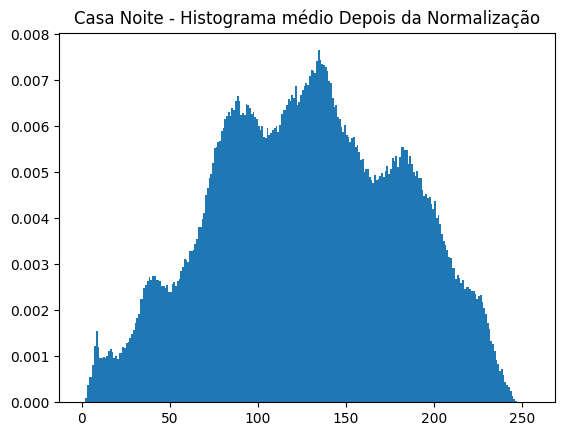

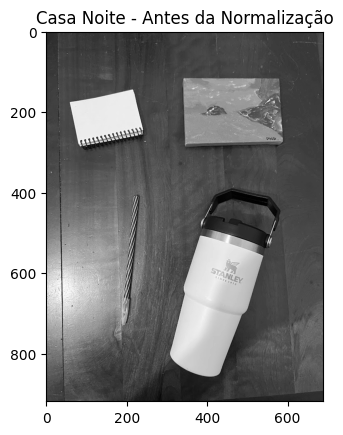

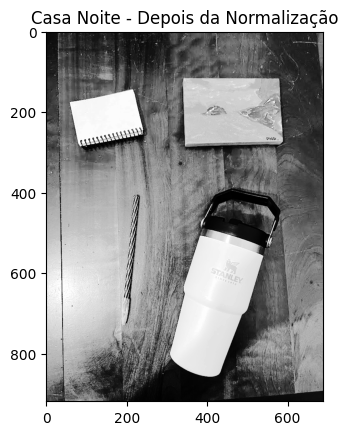

In [9]:
iluminacoes = ['Casa Dia', 'Fora Dia', 'Fora Noite', 'Casa Noite']
for iluminacao in iluminacoes:
    idx_fotos_ilum = df_images[df_images['Iluminação'] == iluminacao]['Idx Foto'].unique().tolist()
    histograma_medio([images_gray[idx].astype(np.int64) for idx in idx_fotos_ilum], f'{iluminacao} - Histograma médio Antes da Normalização')
    histograma_medio([eq_images_gray[idx].astype(np.int64) for idx in idx_fotos_ilum], f'{iluminacao} - Histograma médio Depois da Normalização')
    show(images_gray[idx_fotos_ilum[0]],f'{iluminacao} - Antes da Normalização')
    show(eq_images_gray[idx_fotos_ilum[0]],f'{iluminacao} - Depois da Normalização')


## Para cada processamento

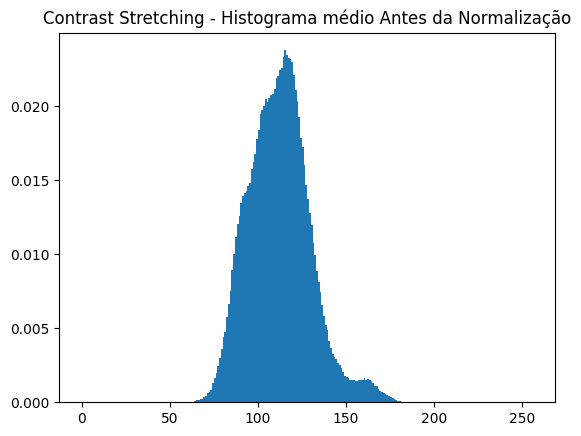

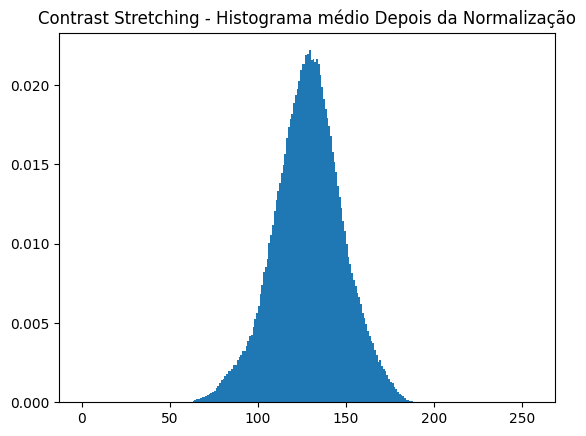

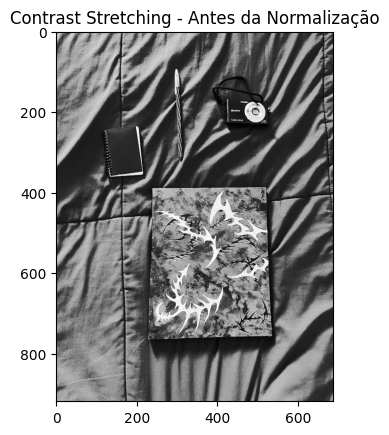

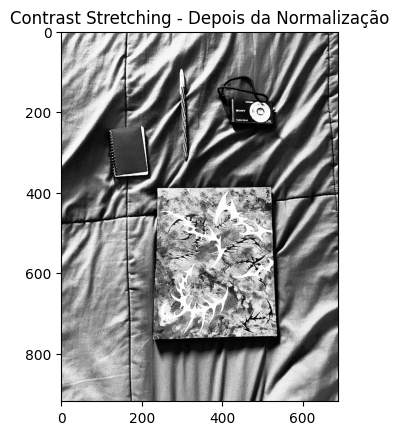

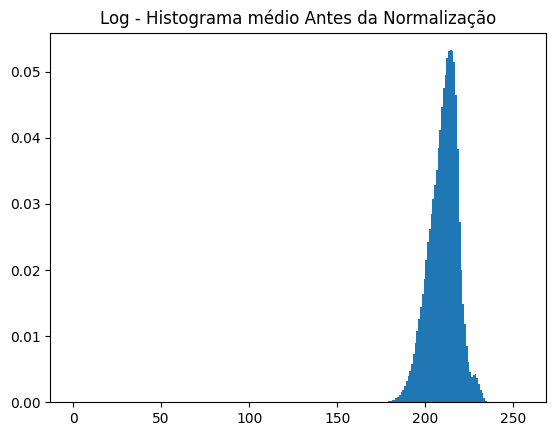

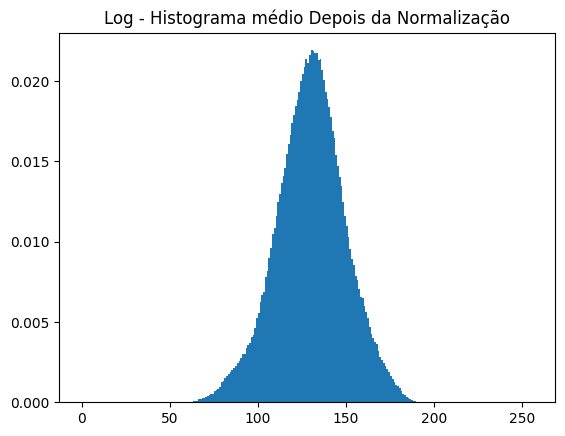

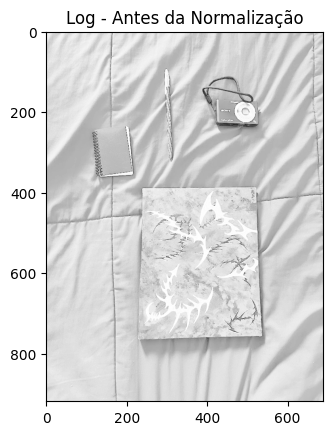

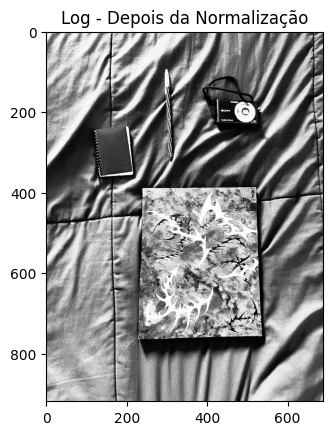

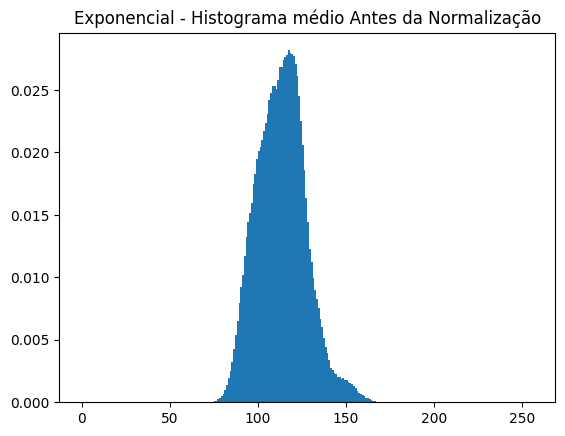

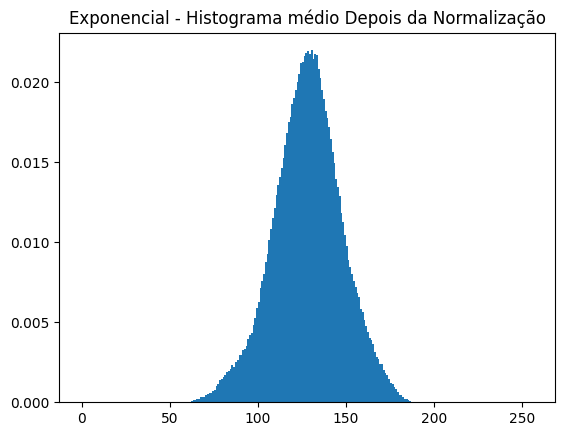

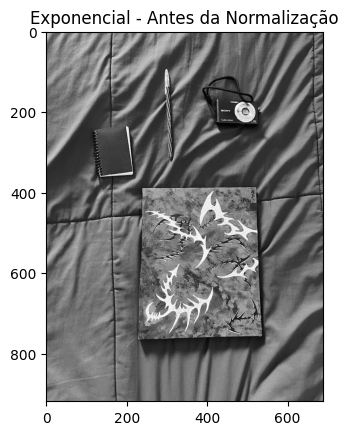

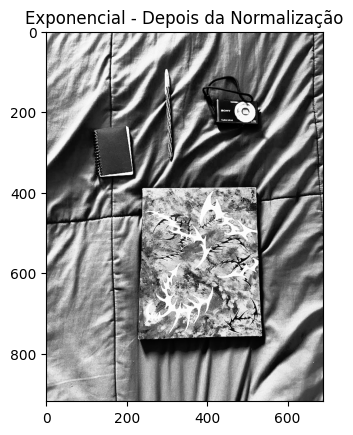

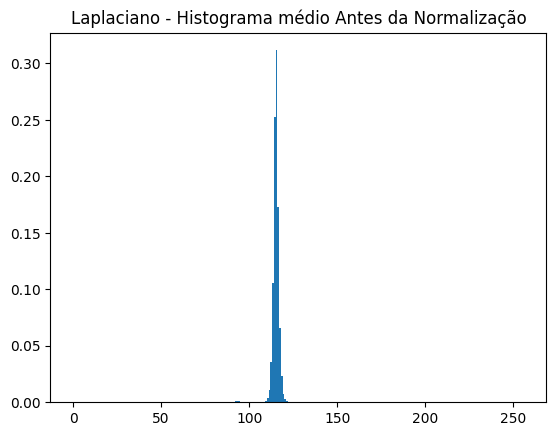

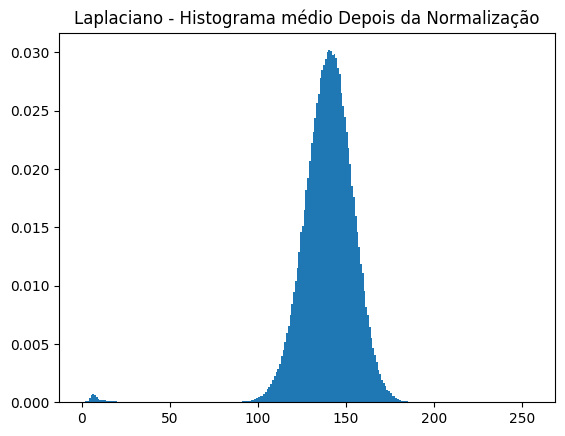

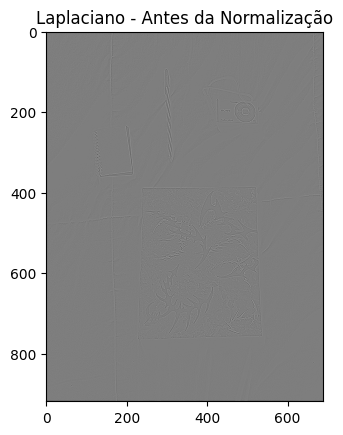

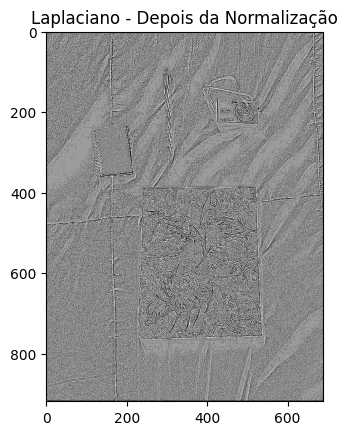

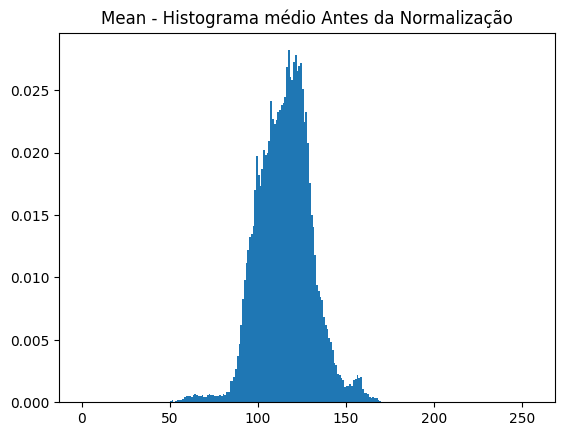

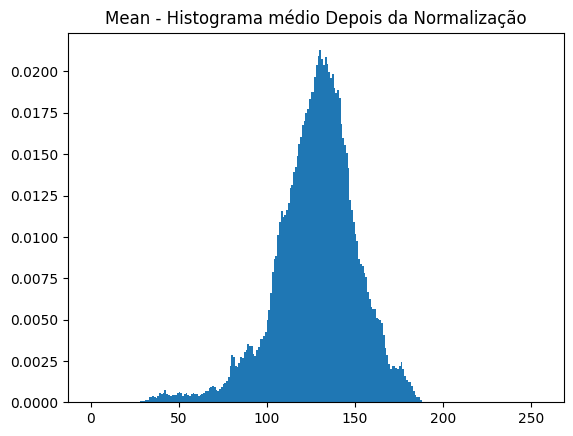

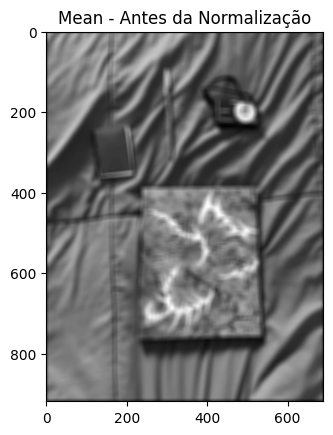

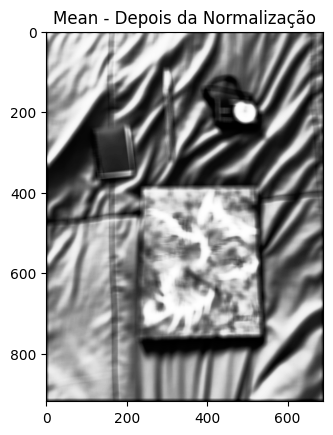

In [10]:
for processamento, dataset_aug, dataset_eq in [
    ['Contrast Stretching', images_stretch, eq_images_stretch],
    ['Log', images_log, eq_images_log],
    ['Exponencial', images_exp, eq_images_exp],
    ['Laplaciano', images_laplacian, eq_images_laplacian],
    ['Mean', images_mean, eq_images_mean],
]:
    histograma_medio([dataset_aug[idx].astype(np.int64) for idx in images_gray.keys()], f'{processamento} - Histograma médio Antes da Normalização')
    histograma_medio([dataset_eq[idx].astype(np.int64) for idx in images_gray.keys()], f'{processamento} - Histograma médio Depois da Normalização')
    show(dataset_aug[0],f'{processamento} - Antes da Normalização')
    show(dataset_eq[0],f'{processamento} - Depois da Normalização')
